In [ ]:
# working with data set 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\Admin\Desktop\pylearn-master\diamond.csv") 
df #with index

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [9]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\pylearn-master\diamond.csv",index_col=0) 
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


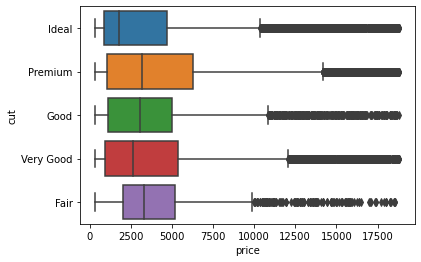

In [5]:
sns.boxplot(x=df['price'],y=df['cut']) #data visualization using blox plot


cut
Fair         3282.0
Good         3050.5
Ideal        1810.0
Premium      3185.0
Very Good    2648.0
Name: price, dtype: float64

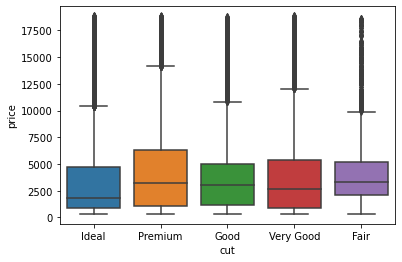

In [4]:
sns.boxplot(x=df['cut'],y=df['price']) #visual representation of the statistical five number summary of variable (s)
df.groupby('cut')['price'].median()

fair category under “cut” have the highest median price

col_0,count
cut,
Fair,1610
Good,4906
Ideal,21551
Premium,13791
Very Good,12082


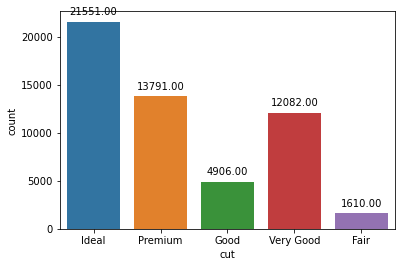

In [5]:
splot=sns.countplot(x="cut", data=df) #data visualisation using countplot, frequency table (one-way table) for the variable “cut” from the dataset “diamond.csv.

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
               va = 'center', xytext = (0, 10), textcoords = 'offset points')
pd.crosstab(index=df['cut'],columns = 'count')

In [23]:
pd.crosstab(index=df['cut'],columns =df['color'],dropna='true') #counting the no. diamonds based on cut and color

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678


color of diamond D being the best and j being the worst. 
cut quality of diamond in increasing order.

In [20]:
data1=df.groupby(["color"])['x'].count()
data1

color
D     6775
E     9797
F     9542
G    11292
H     8304
I     5422
J     2808
Name: x, dtype: int64

where x is the length of diamonf in mm(0--10.74)

In [21]:
df.dtypes # returnts data type of each column

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [22]:
df.info() #short summary

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.9+ MB


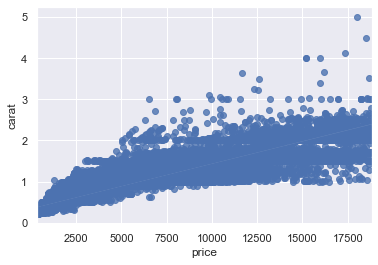

In [31]:
sns.set(style="darkgrid") #data visualization regression plot.
sns.regplot(x=df['price'],y=df['carat'])

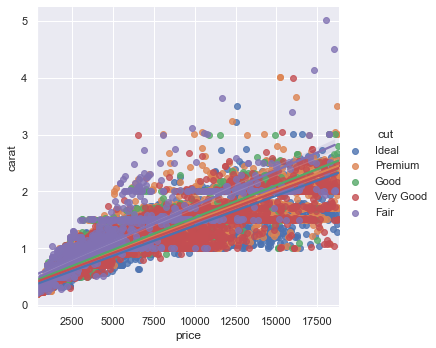

In [38]:
sns.lmplot(x='price',y='carat',data=df, fit_reg='False', hue='cut',legend='True') sns.set(style="darkgrid") #data visualization lmplot(2D scatterplot with an optional overlaid regression line).

